In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_excel(r'/content/Telecom Churn Rate Dataset.xlsx')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

  MonthlyCharges TotalCharges numAdminTickets  numTechTickets Churn  
0          29.85        29.85               0               0    No  
1          56.95       1889.5               0               0    No  
2          53.85       108.15               0               0   Yes  
3          42.30      1840.75               0               3    No  
4          70.70       151.65               0               0   Yes  

[5 rows x 23 columns]

In [3]:
data.drop('customerID',axis=1,inplace=True)

In [4]:
data.duplicated().sum()

17

In [5]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [6]:
def column_info(data):
    cols=[]
    dtype=[]
    unique=[]
    nunique=[]
    null=[]

      for col in data.columns:
        cols.append(col)
        dtype.append(data[col].dtype)
        unique.append(data[col].unique())
        nunique.append(data[col].nunique())
        null.append(data[col].isna().sum()/len(data))

return pd.DataFrame({'cols':cols,'data type':dtype,'unique':unique,'nunqiue':nunique,'nulls':null})

In [7]:
column_info(data)

cols data type  \
0             gender    object   
1      SeniorCitizen     int64   
2            Partner    object   
3         Dependents    object   
4             tenure     int64   
5       PhoneService    object   
6      MultipleLines    object   
7    InternetService    object   
8     OnlineSecurity    object   
9       OnlineBackup    object   
10  DeviceProtection    object   
11       TechSupport    object   
12       StreamingTV    object   
13   StreamingMovies    object   
14          Contract    object   
15  PaperlessBilling    object   
16     PaymentMethod    object   
17    MonthlyCharges   float64   
18      TotalCharges    object   
19   numAdminTickets     int64   
20    numTechTickets     int64   
21             Churn    object   

                                               unique  nunqiue  nulls  
0                                      [Female, Male]        2    0.0  
1                                              [0, 1]        2    0.0  
2                                           [Yes, No]        2    0.0  
3                                           [No, Yes]        2    0.0  
4   [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...       73    0.0  
5                                           [No, Yes]        2    0.0  
6                         [No phone service, No, Yes]        3    0.0  
7                              [DSL, Fiber optic, No]        3    0.0  
8                      [No, Yes, No internet service]        3    0.0  
9                      [Yes, No, No internet service]        3    0.0  
10                     [No, Yes, No internet service]        3    0.0  
11                     [No, Yes, No internet service]        3    0.0  
12                     [No, Yes, No internet service]        3    0.0  
13                     [No, Yes, No internet service]        3    0.0  
14               [Month-to-month, One year, Two year]        3    0.0  
15                                          [Yes, No]        2    0.0  
16  [Electronic check, Mailed check, Bank transfer...        4    0.0  
17  [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...     1585    0.0  
18  [29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5...     6531    0.0  
19                                 [0, 1, 5, 2, 4, 3]        6    0.0  
20                     [0, 3, 2, 4, 1, 6, 5, 7, 8, 9]       10    0.0  
21                                          [No, Yes]        2    0.0

In [8]:
data['TotalCharges'].unique()

array([29.85, 1889.5, 108.15, ..., 346.45, 306.6, 6844.5], dtype=object)

In [9]:
data['TotalCharges'].value_counts()

          11
19.75      9
19.65      8
19.9       8
20.2       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [11]:
data['TotalCharges'].isna().sum()

11

In [12]:
data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)

In [13]:
data['MonthlyCharges'].value_counts()

20.05     59
19.85     45
19.90     44
19.95     44
19.70     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

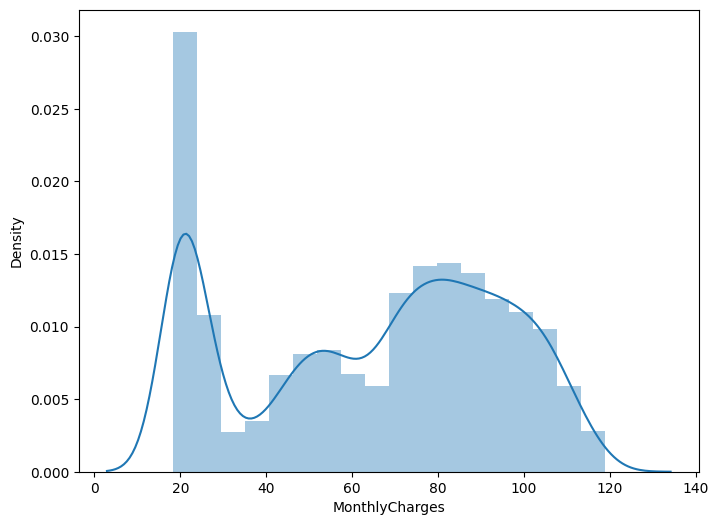

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(data['MonthlyCharges'])
plt.show()

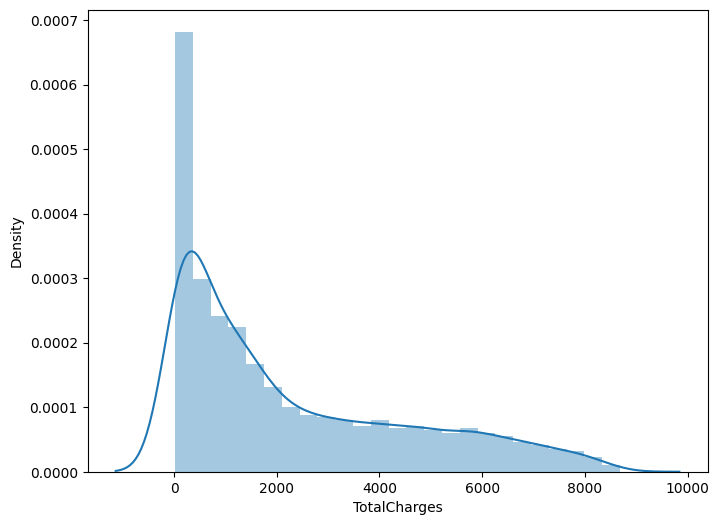

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(data['TotalCharges'])
plt.show()

In [16]:
def check_outliers(data):
    q1=data['TotalCharges'].quantile(0.25)
    q3=data['TotalCharges'].quantile(0.75)
    iqr=q3-q1

    lower= q1-1.5*iqr
    upper=q3+1.5*iqr

    outliers=[]
    for i in range(len(data)):
        if data.loc[i,'TotalCharges'] > upper or data.loc[i,'TotalCharges'] < lower:
            outliers.append(data.loc[i,'TotalCharges'])
    print('outliers')

In [17]:
check_outliers(data)

outliers


In [18]:
def check_outlier(data):
    q1=data['MonthlyCharges'].quantile(0.25)
    q3=data['MonthlyCharges'].quantile(0.75)
    iqr=q3-q1

    lower= q1-1.5*iqr
    upper=q3+1.5*iqr

    outliers=[]
    for i in range(len(data)):
        if data.loc[i,'MonthlyCharges'] > upper or data.loc[i,'MonthlyCharges'] < lower:
            outliers.append(data.loc[i,'MonthlyCharges'])
    print('outliers')

In [19]:
check_outlier(data)

outliers


In [20]:
column_info(data)

cols data type  \
0             gender    object   
1      SeniorCitizen     int64   
2            Partner    object   
3         Dependents    object   
4             tenure     int64   
5       PhoneService    object   
6      MultipleLines    object   
7    InternetService    object   
8     OnlineSecurity    object   
9       OnlineBackup    object   
10  DeviceProtection    object   
11       TechSupport    object   
12       StreamingTV    object   
13   StreamingMovies    object   
14          Contract    object   
15  PaperlessBilling    object   
16     PaymentMethod    object   
17    MonthlyCharges   float64   
18      TotalCharges   float64   
19   numAdminTickets     int64   
20    numTechTickets     int64   
21             Churn    object   

                                               unique  nunqiue  nulls  
0                                      [Female, Male]        2    0.0  
1                                              [0, 1]        2    0.0  
2                                           [Yes, No]        2    0.0  
3                                           [No, Yes]        2    0.0  
4   [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...       73    0.0  
5                                           [No, Yes]        2    0.0  
6                         [No phone service, No, Yes]        3    0.0  
7                              [DSL, Fiber optic, No]        3    0.0  
8                      [No, Yes, No internet service]        3    0.0  
9                      [Yes, No, No internet service]        3    0.0  
10                     [No, Yes, No internet service]        3    0.0  
11                     [No, Yes, No internet service]        3    0.0  
12                     [No, Yes, No internet service]        3    0.0  
13                     [No, Yes, No internet service]        3    0.0  
14               [Month-to-month, One year, Two year]        3    0.0  
15                                          [Yes, No]        2    0.0  
16  [Electronic check, Mailed check, Bank transfer...        4    0.0  
17  [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...     1585    0.0  
18  [29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5...     6530    0.0  
19                                 [0, 1, 5, 2, 4, 3]        6    0.0  
20                     [0, 3, 2, 4, 1, 6, 5, 7, 8, 9]       10    0.0  
21                                          [No, Yes]        2    0.0

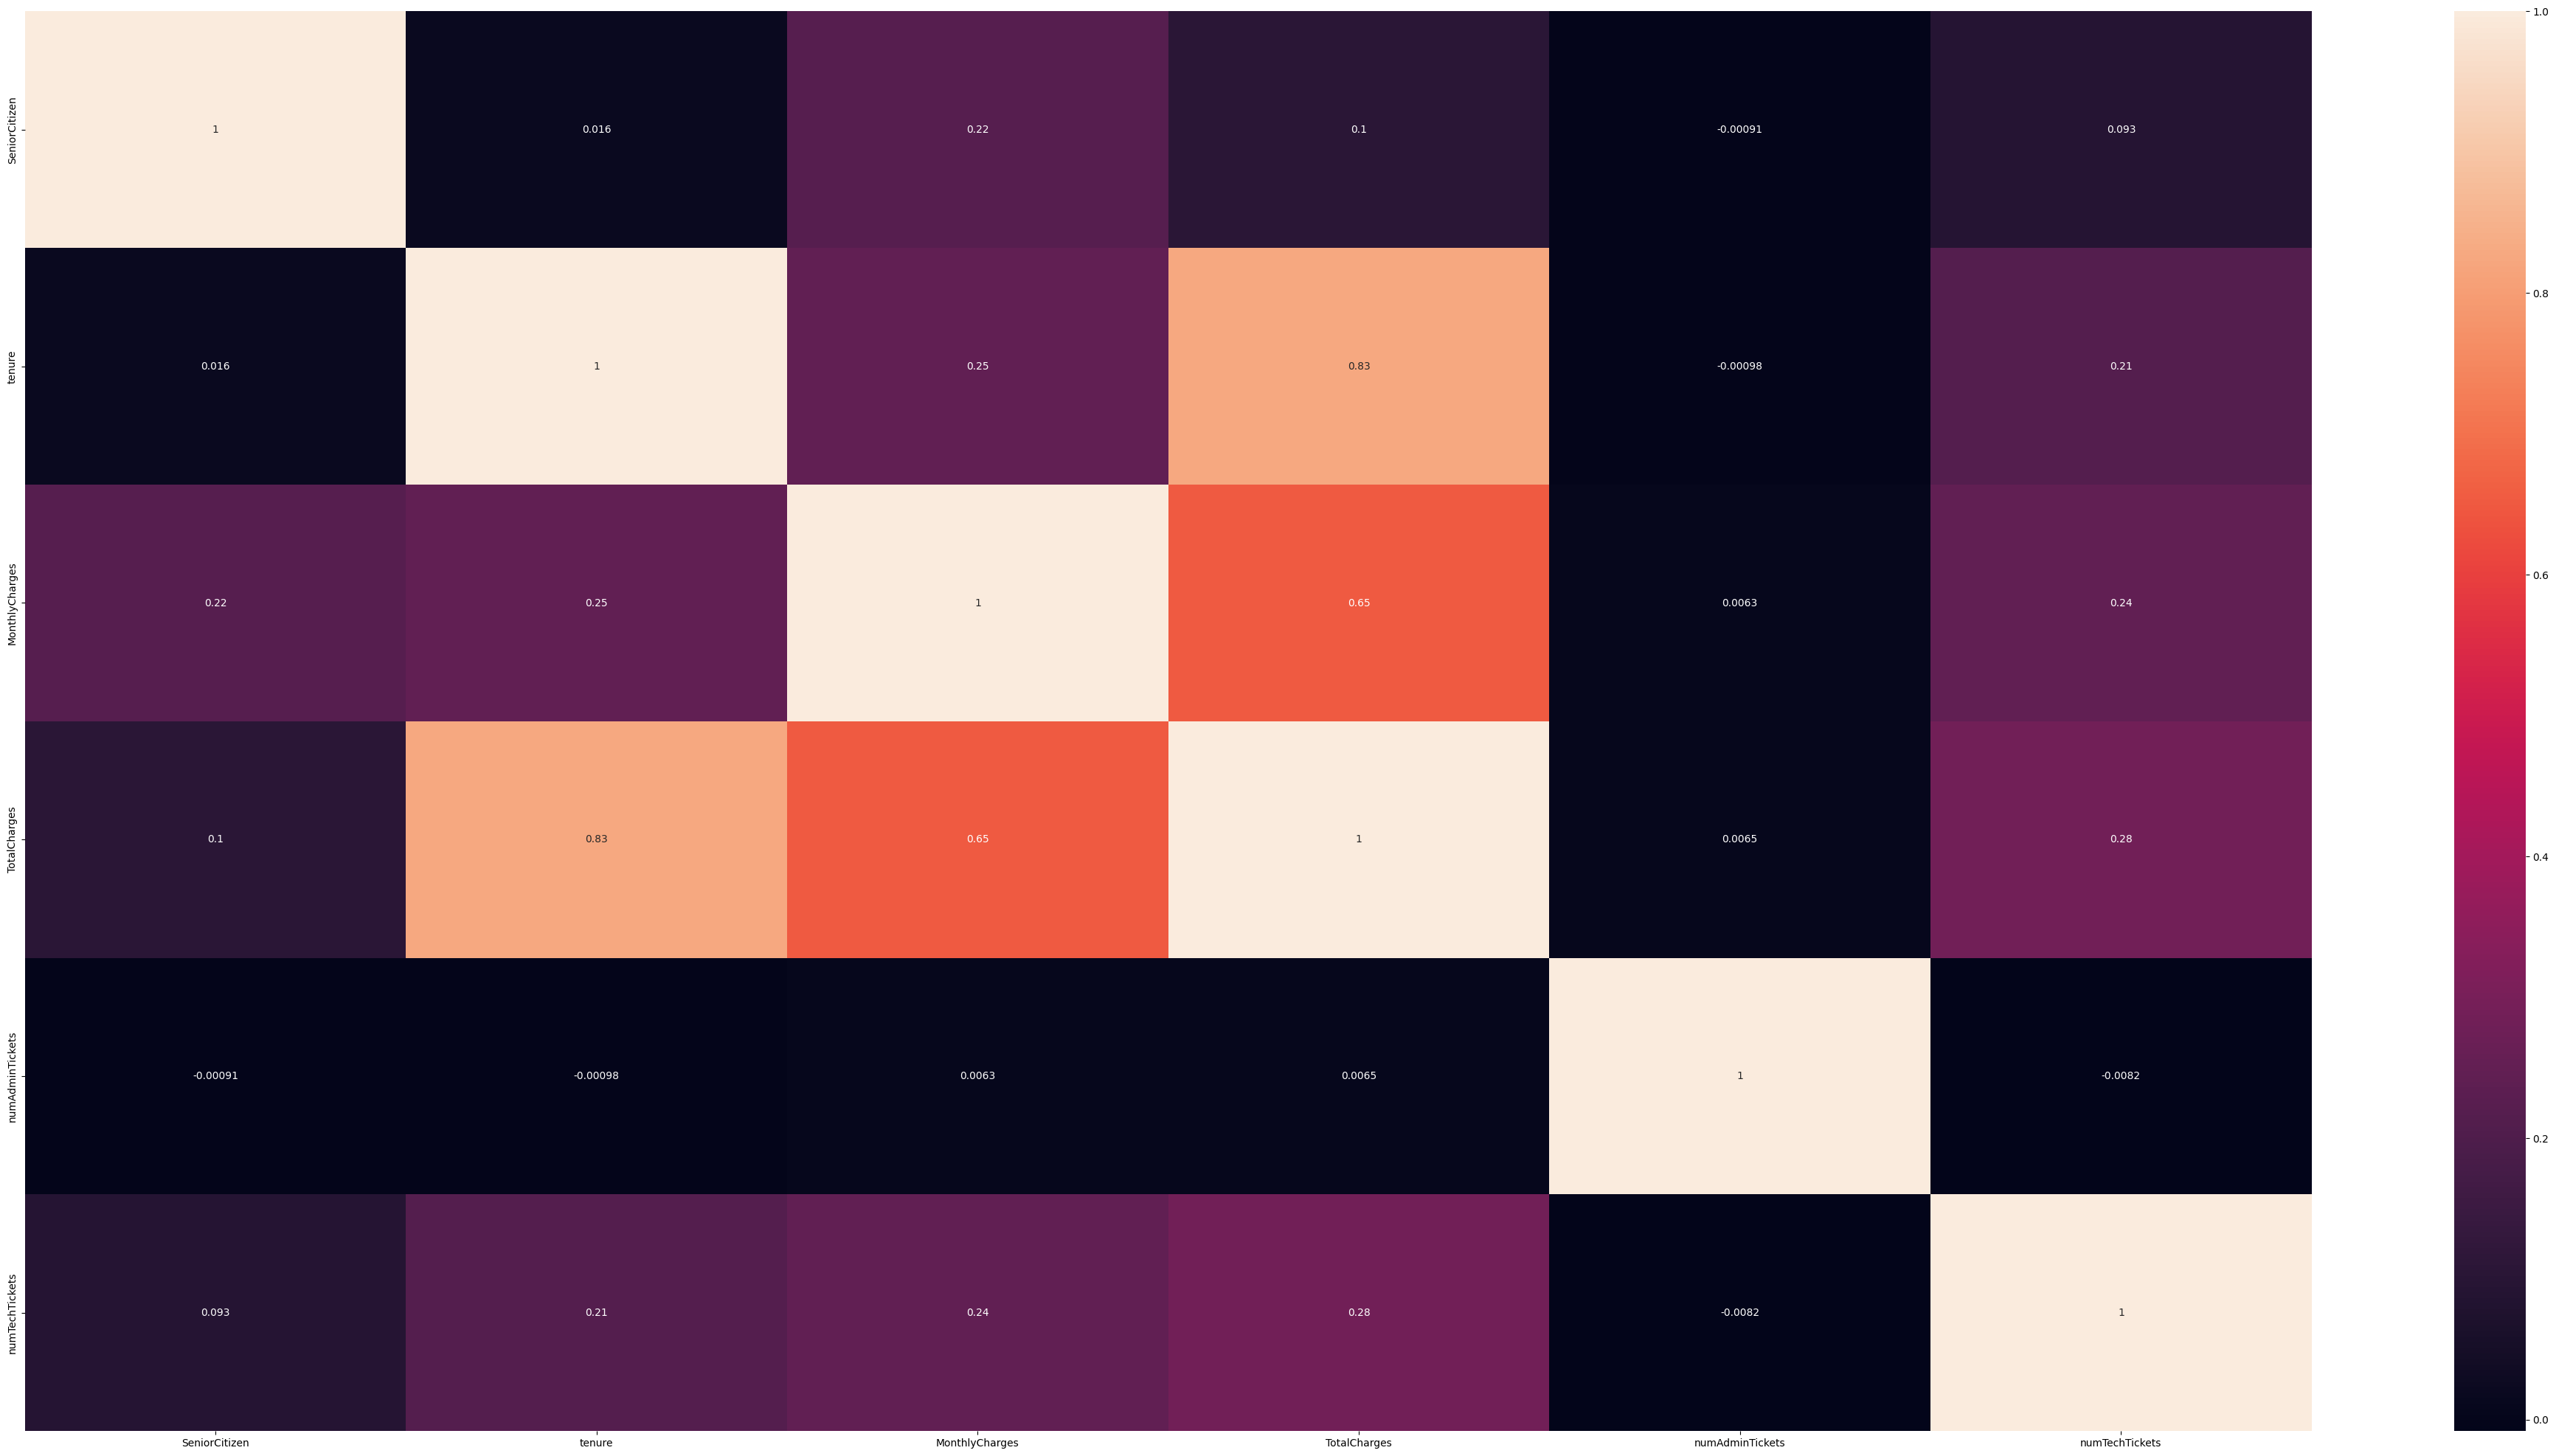

In [21]:
plt.figure(figsize=(50,25))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [28]:
data['Churn']=label_encoder.fit_transform(data['Churn'])
data['Churn'].unique()

array([0, 1])

In [29]:
data=pd.get_dummies(data)
data.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  numAdminTickets  \
0              0       1           29.85         29.85                0   
1              0      34           56.95       1889.50                0   
2              0       2           53.85        108.15                0   
3              0      45           42.30       1840.75                0   
4              0       2           70.70        151.65                0   

   numTechTickets  Churn  gender_Female  gender_Male  Partner_No  ...  \
0               0      0              1            0           0  ...   
1               0      0              0            1           1  ...   
2               0      1              0            1           1  ...   
3               3      0              0            1           1  ...   
4               0      1              1            0           1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 48 columns]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7026 entries, 0 to 7025
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7026 non-null   int64  
 1   tenure                                   7026 non-null   int64  
 2   MonthlyCharges                           7026 non-null   float64
 3   TotalCharges                             7026 non-null   float64
 4   numAdminTickets                          7026 non-null   int64  
 5   numTechTickets                           7026 non-null   int64  
 6   Churn                                    7026 non-null   int64  
 7   gender_Female                            7026 non-null   uint8  
 8   gender_Male                              7026 non-null   uint8  
 9   Partner_No                               7026 non-null   uint8  
 10  Partner_Yes                              7026 no

In [31]:
data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7021    0
7022    0
7023    0
7024    1
7025    0
Name: Churn, Length: 7026, dtype: int64

In [32]:
data.corr()['Churn'][:-1]

SeniorCitizen                              0.151272
tenure                                    -0.351769
MonthlyCharges                             0.194275
TotalCharges                              -0.198247
numAdminTickets                           -0.020281
numTechTickets                             0.358526
Churn                                      1.000000
gender_Female                              0.008825
gender_Male                               -0.008825
Partner_No                                 0.149513
Partner_Yes                               -0.149513
Dependents_No                              0.163683
Dependents_Yes                            -0.163683
PhoneService_No                           -0.011492
PhoneService_Yes                           0.011492
MultipleLines_No                          -0.034183
MultipleLines_No phone service            -0.011492
MultipleLines_Yes                          0.041457
InternetService_DSL                       -0.124512
InternetServ

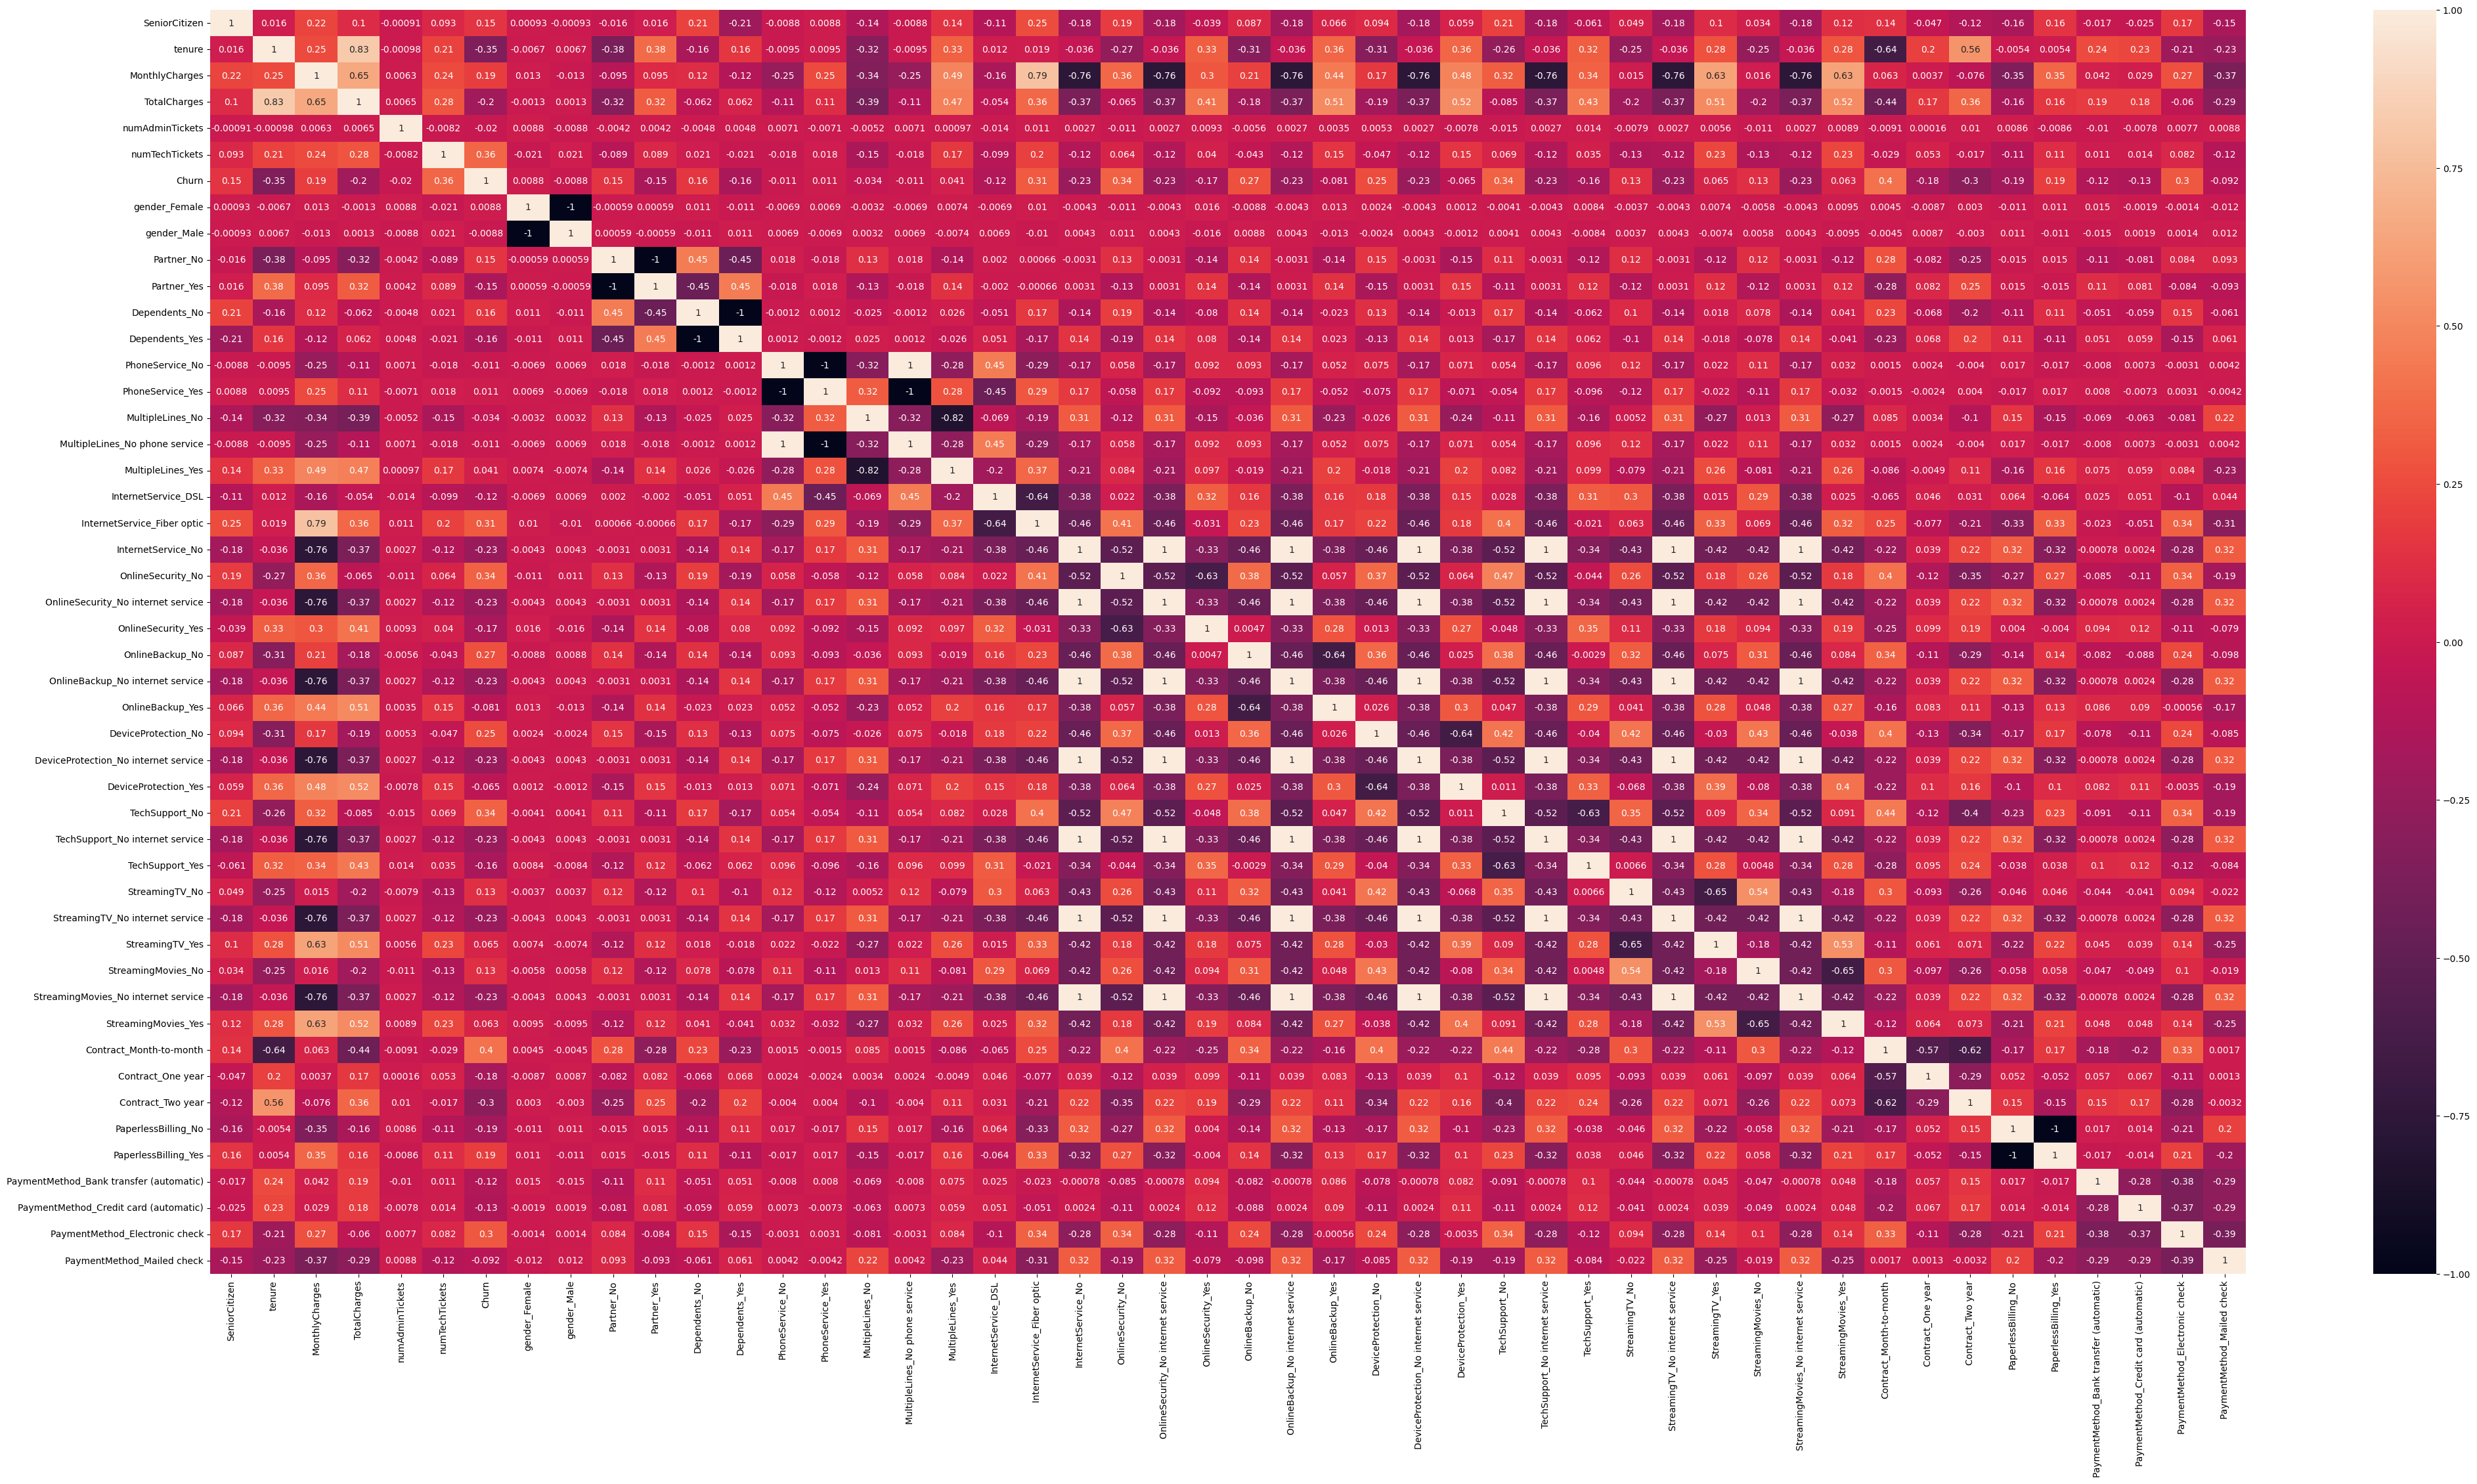

In [33]:
plt.figure(figsize=(50,25))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [34]:
x=data.drop(['Churn'],axis=1).values
y=data['Churn'].values

In [35]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [61]:
from imblearn.combine import SMOTETomek
st=SMOTETomek()
n_train_x,n_train_y=st.fit_resample(train_x,train_y)

In [ ]:
## rondom forest model

In [62]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(n_train_x,n_train_y)

RandomForestClassifier()

In [63]:
from sklearn.metrics import accuracy_score,recall_score ,precision_score, f1_score, confusion_matrix
def evalute(test_x,test_y,model):
  y_pred=model.predict(test_x)
  acc=accuracy_score(test_y,y_pred)
  recall=recall_score(test_y,y_pred)
  precision=precision_score(test_y,y_pred)
  f1=f1_score(test_y,y_pred)
  cm=confusion_matrix(test_y,y_pred)
  specificity=cm[0,0]/(cm[0,1]+cm[0,0])

  return pd.Series({'accuracy_score':acc,'recall_score':recall,'precision_score':precision,'f1_score':f1,'specificity':specificity})


In [64]:
evalute(train_x,train_y,model)

accuracy_score     0.979715
recall_score       0.956288
precision_score    0.966689
f1_score           0.961460
specificity        0.988144
dtype: float64

In [65]:
evalute(test_x,test_y,model) # overfiting

accuracy_score     0.862020
recall_score       0.707775
precision_score    0.756447
f1_score           0.731302
specificity        0.917715
dtype: float64

In [66]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[50,100,200,300,500]
max_depth=[5,6,7,8,9,10]
min_samples_split=[3,4,5,6]

random_grid={'n_estimators':n_estimators,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split}

In [67]:
rs=RandomizedSearchCV(RandomForestClassifier(),param_distributions=random_grid,scoring='accuracy',cv=10,n_jobs=-1)
rs.fit(n_train_x,n_train_y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [3, 4, 5, 6],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500]},
                   scoring='accuracy')

In [68]:
rs.best_params_

{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 10}

In [69]:

model=RandomForestClassifier(**rs.best_params_)
model.fit(n_train_x,n_train_y)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)

In [70]:
evalute(train_x,train_y,model)

accuracy_score     0.894484
recall_score       0.862139
precision_score    0.767665
f1_score           0.812163
specificity        0.906121
dtype: float64

In [71]:
evalute(test_x,test_y,model) 

accuracy_score     0.858464
recall_score       0.777480
precision_score    0.714286
f1_score           0.744544
specificity        0.887706
dtype: float64

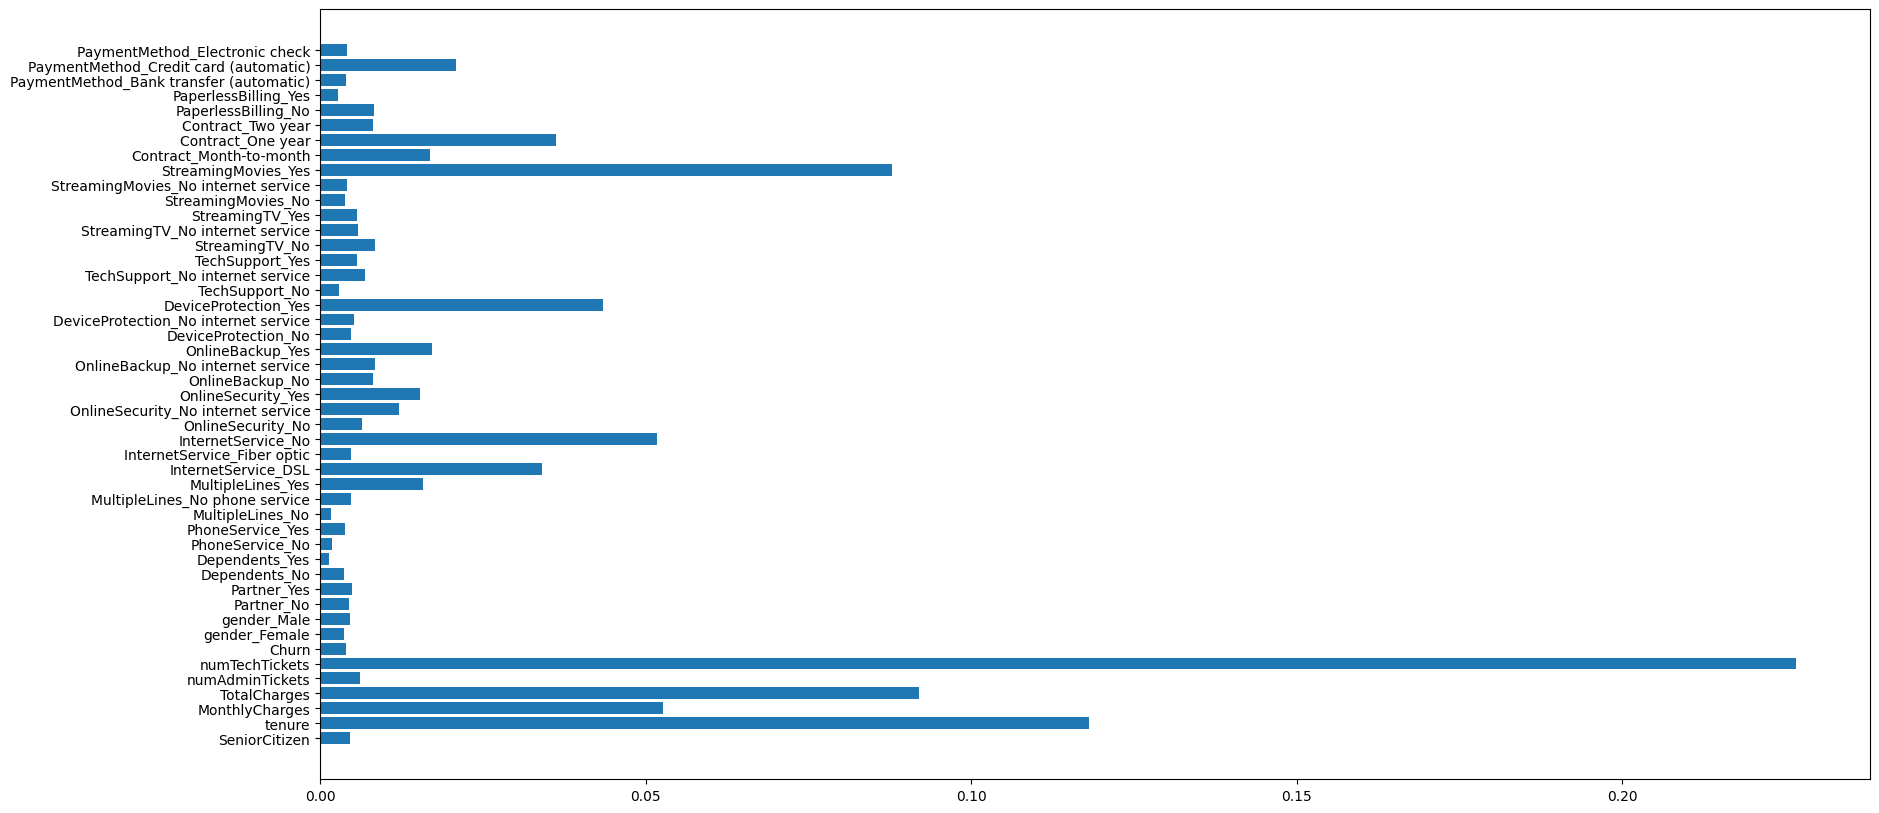

In [59]:
plt.figure(figsize=(20,10))
plt.barh(data.columns[:-1],model.feature_importances_)
plt.show()